In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('iris.csv')
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [4]:
df['class']=encoder.fit_transform(df['class'])

In [5]:
#Now we will be taking only two features and the output column
#We will also be excluding a class of flowers which is encoded as 0, we are coverting this to a binary classification problem 
df=df[df['class'] !=0][['sepal width','petal length','class']]

In [6]:
df

,sepal width,petal length,class
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [7]:
#50 rows of setosa has been deleted


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.columns

Index(['sepal width', 'petal length', 'class'], dtype='object')

In [10]:
df

,sepal width,petal length,class
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [11]:
df.sample(100) #This shuffles all the rows.

,sepal width,petal length,class
95,3.0,4.2,1
91,3.0,4.6,1
130,2.8,6.1,2
75,3.0,4.4,1
128,2.8,5.6,2
...,...,...,...
87,2.3,4.4,1
149,3.0,5.1,2
78,2.9,4.5,1
104,3.0,5.8,2


In [12]:
#Taking only 10 rows for training
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10) #Taking out 10 random rows from first 60 rows
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [13]:
df_train

,sepal width,petal length,class
139,3.1,5.4,2
143,3.2,5.9,2
102,3.0,5.9,2
127,3.0,4.9,2
80,2.4,3.8,1
109,3.6,6.1,2
58,2.9,4.6,1
115,3.2,5.3,2
126,2.8,4.8,2
90,2.6,4.4,1


In [14]:
X_test=df_val.iloc[:,0:2].values #.values converts the dataframe to arrays
y_test=df_val.iloc[:,-1].values  #.values converts the dataframe to arrays

In [15]:
X_test

array([[3. , 5.8],
       [3.8, 6.4],
       [2.8, 5.6],
       [2.8, 5.1],
       [2.7, 4.1]])

# Case-1- Bagging

In [16]:
#Data for tree 1 
df_bag=df_train.sample(8,replace=True) #replace=True indicates that a row can come multiple times inside the sample

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal width,petal length,class
115,3.2,5.3,2
58,2.9,4.6,1
126,2.8,4.8,2
102,3.0,5.9,2
80,2.4,3.8,1
90,2.6,4.4,1
90,2.6,4.4,1
80,2.4,3.8,1


In [17]:
#You can note that rows with index=122 has been repeated because of replace=True

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score

In [21]:
dt_bag1=DecisionTreeClassifier()
#since we have not specified the max depth of the decision tree, it will be a fully grown decision tree.
#There will be low bias and high variance

In [24]:
def evaluate(clf,X,y):
    clf.fit(X,y) #training
    plot_tree(clf) #plotting the decision tree
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2) #for plotting the decision region
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

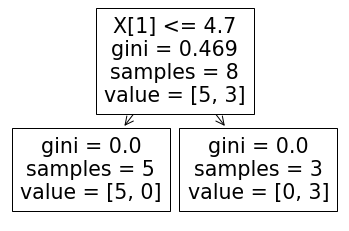

NameError: name 'plot_decision_regions' is not defined

In [25]:
evaluate(dt_bag1,X,y)

In [26]:
#data for tree 2
df_bag=df_train.sample(8,replace=True) # creating new sample for decision tree 2

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal width,petal length,class
139,3.1,5.4,2
115,3.2,5.3,2
90,2.6,4.4,1
80,2.4,3.8,1
139,3.1,5.4,2
80,2.4,3.8,1
115,3.2,5.3,2
102,3.0,5.9,2


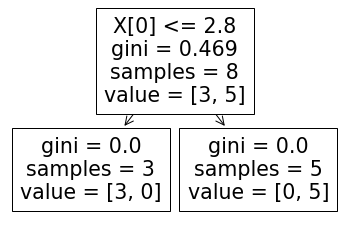

NameError: name 'plot_decision_regions' is not defined

In [29]:
dt_bag2=DecisionTreeClassifier() #decision tree will be created till maximum depth
evaluate(dt_bag2,X,y)

In [36]:
#data for tree 3
df_bag=df_train.sample(8,replace=True) # creating new sample for decision tree 3

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal width,petal length,class
58,2.9,4.6,1
139,3.1,5.4,2
127,3.0,4.9,2
90,2.6,4.4,1
102,3.0,5.9,2
126,2.8,4.8,2
143,3.2,5.9,2
126,2.8,4.8,2


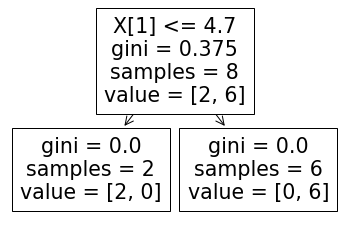

NameError: name 'plot_decision_regions' is not defined

In [37]:
dt_bag3=DecisionTreeClassifier() #decision tree will be created till maximum depth
evaluate(dt_bag3,X,y)

# Predict(Aggregation)

In [38]:
df_test

,sepal width,petal length,class
87,2.3,4.4,1
76,2.8,4.8,1
137,3.1,5.5,2
141,3.1,5.1,2
94,2.7,4.2,1


In [41]:
print('Predictor 1:',dt_bag1.predict(np.array([2.3,4.4]).reshape(1,2))
print('Predictor 2:',dt_bag2.predict(np.array([2.3,4.4]).reshape(1,2))
print('Predictor 3:',dt_bag3.predict(np.array([2.3,4.4]).reshape(1,2))

SyntaxError: invalid syntax (<ipython-input-41-6b2e7b462a2b>, line 2)